# Data Cleaning

In [7]:
import pandas as pd

# Create a DataFrame
data = {
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, None ],
    "city": ["New York", None, "Chicago"]
}

df = pd.DataFrame(data)

# Save DataFrame as CSV
df.to_csv("data.csv", index=False)

print("CSV file created successfully!")


CSV file created successfully!


In [15]:
# Load dataset (Replace 'your_file.csv' with an actual CSV file)
df = pd.read_csv("data.csv")

# Display the first few rows
print(df.head())



# Ensure 'age' is numeric (this will convert None to NaN)
df["age"] = pd.to_numeric(df["age"])

# Check missing values
print("\nMissing values before filling:\n", df.isnull().sum())

# Fill missing values correctly (without inplace=True)
df["age"] = df["age"].fillna(df["age"].mean())  # Fill age column
df["city"] = df["city"].fillna("Unknown")  # Fill city column

# Check missing values after filling
print("\nMissing values after filling:\n", df.isnull().sum())

# Display the cleaned DataFrame
print("\nCleaned DataFrame:\n", df)


      name   age      city
0    Alice  25.0  New York
1      Bob  30.0       NaN
2  Charlie   NaN   Chicago

Missing values before filling:
 name    0
age     1
city    1
dtype: int64

Missing values after filling:
 name    0
age     0
city    0
dtype: int64

Cleaned DataFrame:
       name   age      city
0    Alice  25.0  New York
1      Bob  30.0   Unknown
2  Charlie  27.5   Chicago


# Exploratory Data Analysis (EDA)
Use a dataset (e.g., Titanic dataset) and generate summary statistics, histograms, and correlation heatmaps

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891

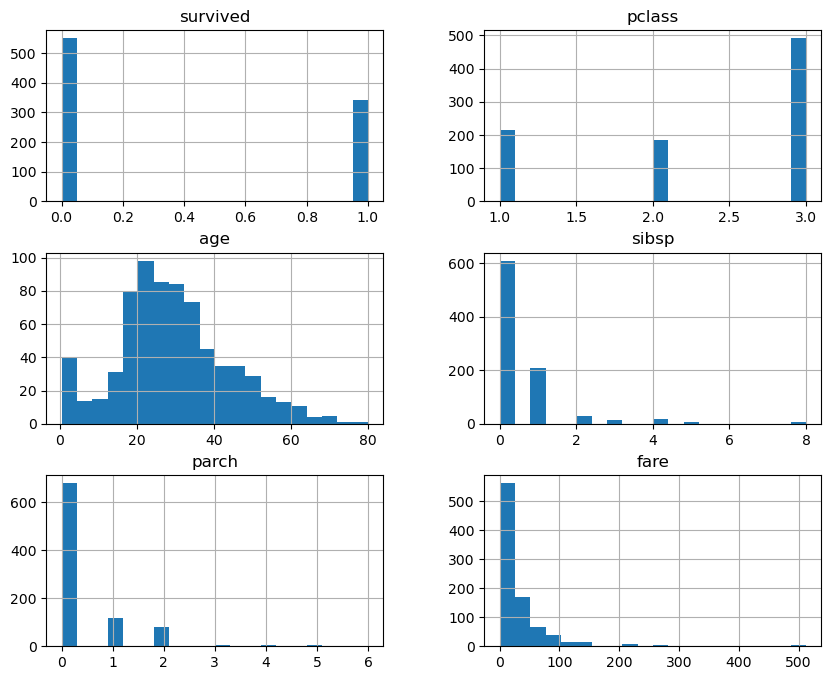

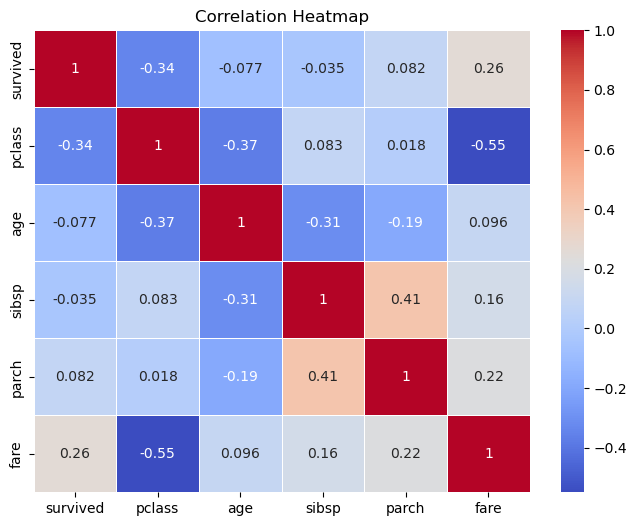

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from Seaborn
df = sns.load_dataset("titanic")

# Display summary statistics
print(df.describe())

# Show dataset infoa
print(df.info())

# Plot histograms for numerical columns
df.hist(figsize=(10, 8), bins=20)
plt.show()

# Correlation heatmap (Select only numeric columns)
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# Analysis of data
## Column Breakdown:
<p>Column	    Description <br>
survived - 	Whether the passenger survived (0 = No, 1 = Yes). <br>
pclass	 -   Passenger class (1st, 2nd, or 3rd). <br>
age	     -   Age of the passenger. <br>
sibsp	 -   Number of siblings/spouses aboard the Titanic. <br>
parch	 -   Number of parents/children aboard the Titanic. <br>
fare	 -   Price paid for the ticket. <br> </p>

## Understanding Each Statistic:
Statistic	Meaning <br>
count	-    The number of non-null (non-missing) values in each column.<br>
mean	-   The average (mean) value of each column.<br>
std	    -    The standard deviation, showing how much the values vary from the mean. A higher value means more variation.<br>
min	    -    The minimum (smallest) value in the column.<br>
25%	    -    The first quartile (25% of the values are below this).<br>
50%	    -    The median (middle value, 50% of values are below this).<br>
75%	    -    The third quartile (75% of the values are below this).<br>
max	    -    The maximum (largest) value in the column.<br>

## Key Insights from the Data:
Survival Rate (survived column)
Mean = 0.38, meaning about 38% of passengers survived (since 1 = survived).

Passenger Class (pclass column)
The mean is 2.31, meaning most passengers were in 3rd class (since 1st class is 1, 2nd class is 2, and 3rd class is 3).

Age (age column)
Mean = 29.7 years old.
Minimum age = 0.42 years (probably an infant).
Maximum age = 80 years.
Only 714 values exist, meaning 177 passengers had missing ages.

Siblings/Spouses (sibsp column)
Most people traveled alone (median = 0).
Maximum = 8 siblings/spouses on board (likely a large family).

Parents/Children (parch column)
Most passengers had no parents or children (median = 0).
Maximum = 6 parents/children on board.

Fare Price (fare column)
Average ticket price = $32.20.
Minimum ticket price = $0.00 (likely crew or special cases).
Maximum fare = $512.33, suggesting some passengers paid extremely high amounts (e.g., first-class luxury tickets).


# code explaination
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)

sns.heatmap()     → Creates a heatmap using Seaborn.
annot=True        → Displays correlation values in the heatmap.
cmap="coolwarm"   → Uses a color gradient:

   Red = Strong negative correlation (-1).
   Blue = Strong positive correlation (+1).
   White = No correlation (0).

linewidths=0.5    → Adds small gaps between cells for clarity.


# Data Visualization

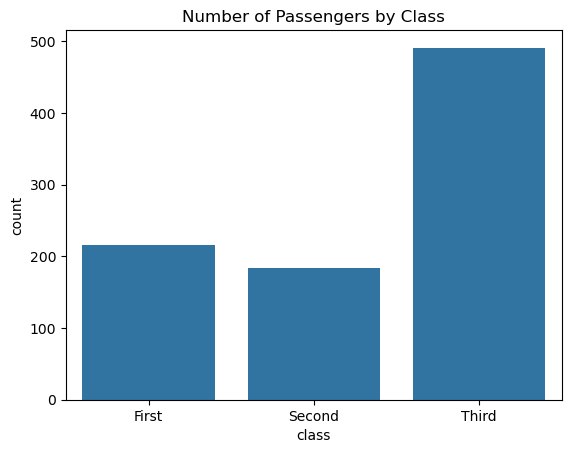

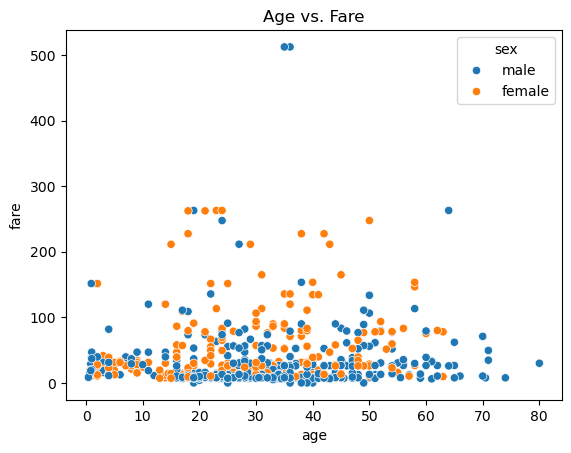

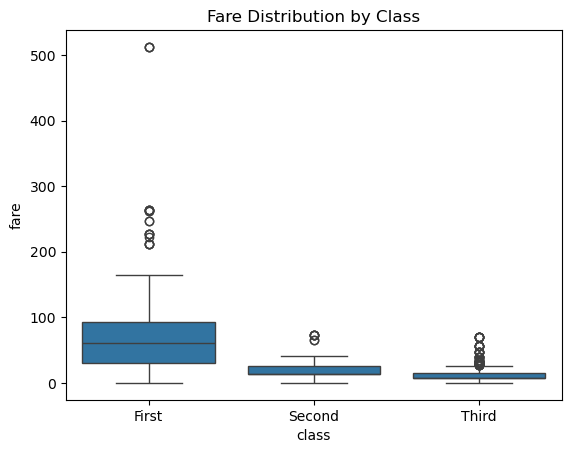

In [15]:
# Bar chart: Count of passengers by class
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
sns.countplot(x="class", data=df)
plt.title("Number of Passengers by Class")
plt.show()

# Scatter plot: Age vs. Fare
sns.scatterplot(x="age", y="fare", data=df, hue="sex")
plt.title("Age vs. Fare")
plt.show()

# Boxplot: Fare distribution by class
sns.boxplot(x="class", y="fare", data=df)
plt.title("Fare Distribution by Class")
plt.show()


# Feature Engineering
## Example 1: Extract Hour from a Timestamp

In [18]:
import pandas as pd

# Sample dataset with timestamps
data = {
    "timestamp": ["2025-02-21 14:30:00", "2025-02-21 18:45:00", "2025-02-21 22:15:00"]
}

df = pd.DataFrame(data)

# Convert to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Extract hour from timestamp
df["hour"] = df["timestamp"].dt.hour

print(df)


            timestamp  hour
0 2025-02-21 14:30:00    14
1 2025-02-21 18:45:00    18
2 2025-02-21 22:15:00    22


##  Example 2: Categorizing Age Groups (Binning)

In [21]:
import numpy as np

# Sample dataset with ages
df = pd.DataFrame({"age": [15, 22, 35, 42, 57, 64, 78]})

# Define age bins
bins = [0, 18, 35, 50, 65, 100]
labels = ["Teen", "Young Adult", "Adult", "Middle-aged", "Senior"]

# Create age categories
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)

print(df)


   age    age_group
0   15         Teen
1   22  Young Adult
2   35  Young Adult
3   42        Adult
4   57  Middle-aged
5   64  Middle-aged
6   78       Senior


# Linear Regression (Predict House Prices)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

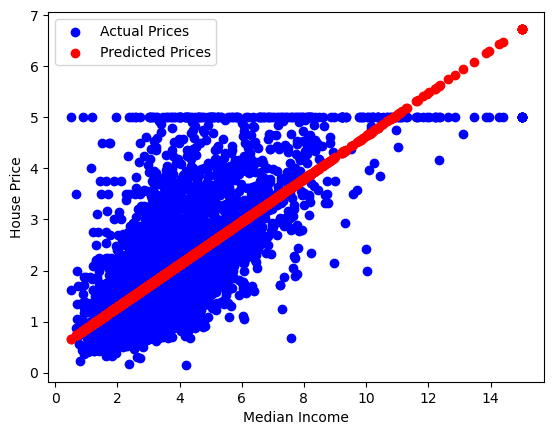

In [45]:
import pandas as pd #Handles data in tabular format.
import numpy as np #Supports numerical operations.
import matplotlib.pyplot as plt #Used for visualization.
from sklearn.model_selection import train_test_split #Splits the dataset into training and testing sets.
from sklearn.linear_model import LinearRegression # Implements Linear Regression.
from sklearn.datasets import fetch_california_housing # Loads the California housing dataset.

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)
# Select features (square footage is not in this dataset, so we use 'MedInc' as a proxy)
X = df[["MedInc"]]  # Median Income (acts as an independent variable)
y = data.target  # House price we need to predict
#The California Housing dataset is a built-in dataset in scikit-learn.
#According to Scikit-Learn’s documentation, the target variable (data.target) represents the median house value in $100,000 units.

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train_test_split() → Splits the data into training and testing sets.
#test_size=0.2 → 20% of the data is used for testing, 80% for training.
#random_state= 42 → Ensures consistent results when running the code multiple times.
#Training data is used to train the model, and testing data is used to evaluate its performance.

# Train the model
model = LinearRegression()
model.fit(X_train, y_train) #Trains the model by finding the best-fit line

# Make predictions
y_pred = model.predict(X_test) #Uses the trained model to predict house prices for the test data.

# Plot
plt.scatter(X_test, y_test, color="blue", label="Actual Prices")
plt.scatter(X_test, y_pred, color="red", label="Predicted Prices")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend() #description of the color dot
plt.show()


# Classification (Decision Tree & Logistic Regression) 
## Example 1: Decision Tree (Titanic Survival Prediction)

In [54]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = sns.load_dataset("titanic")

# Select relevant columns & drop missing values
df = df[["sex", "age", "fare", "survived"]].dropna() #remove row with missing value

# Convert categorical data
df["sex"] = df["sex"].map({"male": 0, "female": 1})

# Features and target
X = df[["sex", "age", "fare"]]  # Independent variables
y = df["survived"]  # Dependent variable

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6853146853146853


### How the model works
The Decision Tree learns patterns from the training data. <br>
It finds rules like: <br>
If sex = female, the passenger is more likely to survive.  <br>
If fare is high, the passenger might have a higher chance of survival.  <br>
If age is very young or very old, survival chances may change.  <br>
Once trained, the model can predict survival for new passengers.  <br>

##  Example 2: Logistic Regression (Predict Iris Flower Type)

In [60]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = sns.load_dataset("iris")
print(df)
# Encode species labels (convert text to numbers)
le = LabelEncoder() #LabelEncoder converts them into numeric values (0, 1, 2) so that the model can process them
df["species"] = le.fit_transform(df["species"])

# Features & Target
X = df.drop(columns=["species"]) #X contains all columns except species (used for prediction).
y = df["species"] #y is the species column (our classification target).

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200) #max_iter=200 ensures more iterations for convergence.
model.fit(X_train, y_train)

# Predict & accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
Accuracy: 1.0


### What Does This Model Do?
This Logistic Regression model predicts the species of an Iris flower based on: <br>
Sepal length, Sepal width,Petal length, Petal width <br>
If given new flower measurements, the model will classify it as Setosa (0), Versicolor (1), or Virginica (2). <br>

# Time Series Analysis
Analyze a time series dataset (e.g., stock prices) and forecast future values using ARIMA or LSTM models. 

### What is Time Series Analysis?
A time series is a sequence of data points collected at regular time intervals (e.g., daily stock prices, temperature readings). Time series analysis helps us detect trends and make forecasts.

### What is ARIMA?
ARIMA (AutoRegressive Integrated Moving Average) is a popular model for time series forecasting. It consists of: <br>
AR (AutoRegression): Uses past values to predict future ones.<br>
I (Integration): Differencing the data to make it stationary (removing trends).<br>
MA (Moving Average): Uses past forecasting errors to improve predictions.<br>

In [83]:
import pandas as pd
import numpy as np

# Create date range
date_rng = pd.date_range(start="2020-01-01", end="2023-12-31", freq="D")

# Generate random stock prices
np.random.seed(42)
stock_prices = np.cumsum(np.random.randn(len(date_rng)) * 2 + 0.5) + 100  # Start around 100

# Create DataFrame
df = pd.DataFrame({"Date": date_rng, "Close": stock_prices})

# Save as CSV
df.to_csv("stock_prices.csv", index=False)

print("CSV file created successfully!")
print(df)


CSV file created successfully!
           Date       Close
0    2020-01-01  101.493428
1    2020-01-02  101.716900
2    2020-01-03  103.512277
3    2020-01-04  107.058336
4    2020-01-05  107.090030
...         ...         ...
1456 2023-12-27  955.646857
1457 2023-12-28  956.909174
1458 2023-12-29  959.988679
1459 2023-12-30  961.835042
1460 2023-12-31  962.058130

[1461 rows x 2 columns]


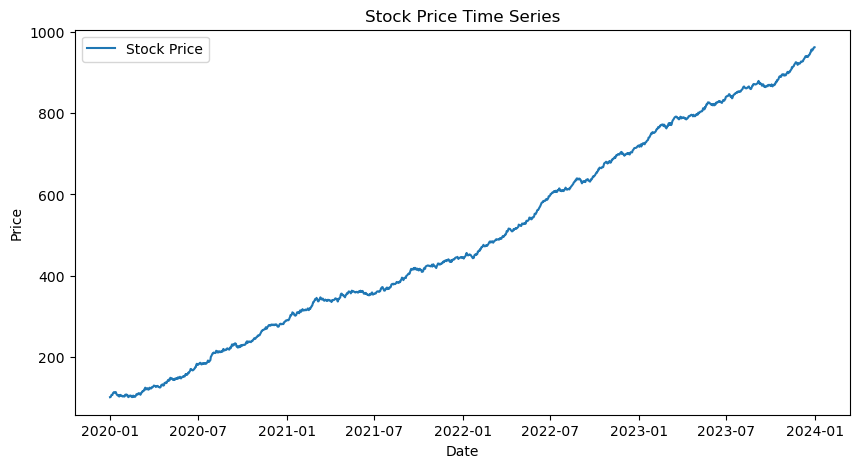

ADF Statistic: 1.6053531841004887
p-value: 0.997873547298332


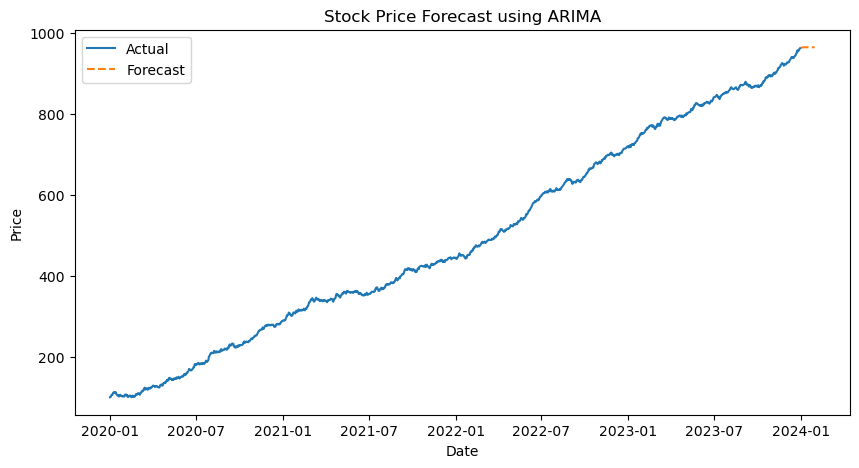

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load dataset (Example: Stock Prices)
df = pd.read_csv("stock_prices.csv", parse_dates=["Date"]) #ensuring the "Date" column is recognized as datetime.
df.set_index("Date", inplace=True) #Sets "Date" as the index for time series analysis.
df = df.asfreq("D")  # Explicitly set frequency to daily
#If the dataset has missing dates (e.g., weekends with no stock prices), asfreq("D") fills in missing dates.

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df, label="Stock Price")
plt.title("Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(df["Close"]) #Uses Augmented Dickey-Fuller (ADF) test to check if the time series is stationary.
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If p-value > 0.05, the data is non-stationary, so we difference it
if result[1] > 0.05:
    df["Close_diff"] = df["Close"].diff().dropna()
#Differencing (.diff()) is applied to remove trends if the data is non-stationary.
#This transforms the time series into a stationary one.

# Train ARIMA model
model = ARIMA(df["Close"].dropna(), order=(5, 1, 0))  # (p=5, d=1, q=0)
#p=5: Uses 5 past values (lags) to predict the next one.
#d=1: First-order differencing is applied.
#q=0: No moving average component
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=30)  # Predict next 30 days

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Actual")
plt.plot(pd.date_range(df.index[-1], periods=31, freq="D")[1:], forecast, label="Forecast", linestyle="dashed")
#Creates a range of dates starting from the last date in df.index (df.index[-1]).
#Generates 31 dates (periods=31), one for each day.
#Frequency is daily ("D"), ensuring each step is one day apart.
#[1:] removes the first date (df.index[-1]).
plt.title("Stock Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


# K-Means Clustering
K-Means is an unsupervised machine learning algorithm used to group data points into K clusters. It minimizes the distance between data points within a cluster and assigns each point to the closest centroid. <br>
Example Use Case: Segment customers based on their annual income and spending score from a shopping dataset.



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

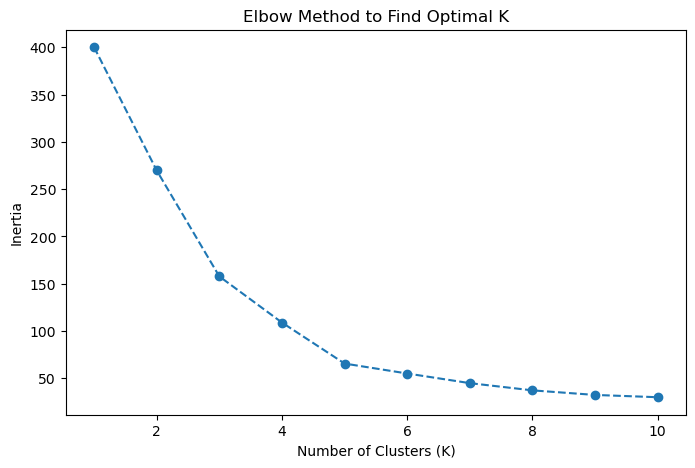

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


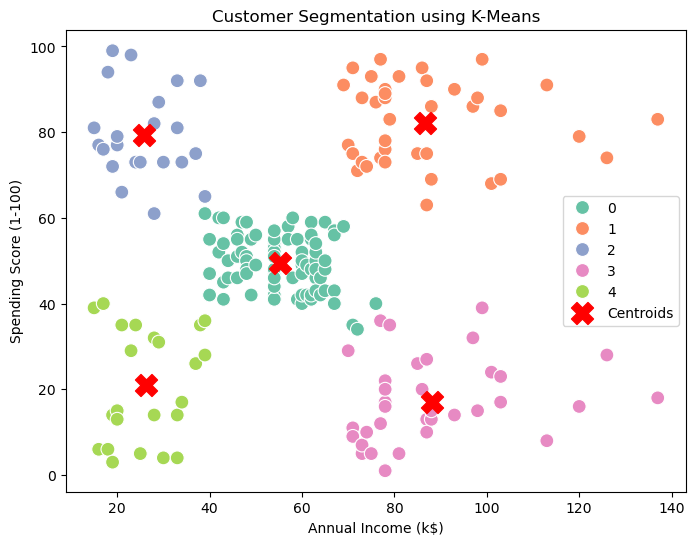

In [108]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Mall_Customers.csv")
print(df.head())

# Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal K using inertia (Elbow Method)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Find Optimal K")
plt.show()

# Train K-Means model with K=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Display first few rows with cluster labels
print(df.head())

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["Cluster"], 
    palette="Set2",
    s=100
)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0],  
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1],  
            s=250, marker="X", c="red", label="Centroids")  # Plot centroids
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()
